In [2]:
from torchvision import datasets, transforms

train_set = datasets.MNIST('./', train=True, transform=transforms.ToTensor(), download=True)
test_set = datasets.MNIST('./', train=False, transform=transforms.ToTensor(), download=False)

print('Amostras de treino: ' + str(len(train_set)) + '\nAmostras de teste: ' + str(len(test_set)))

Amostras de treino: 60000
Amostras de teste: 10000


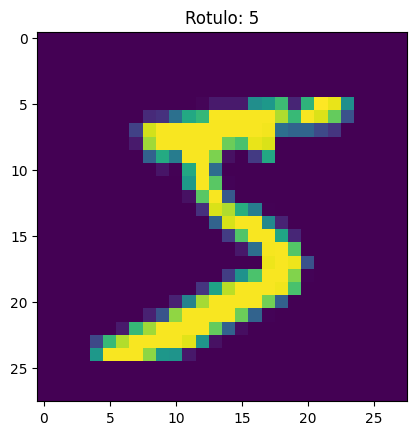

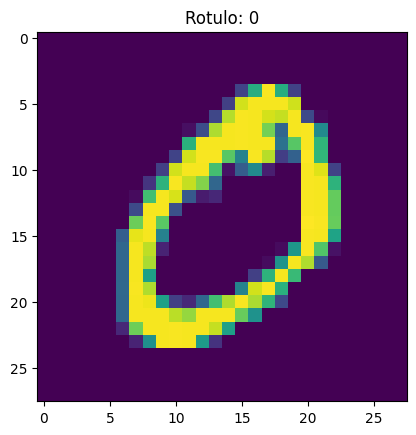

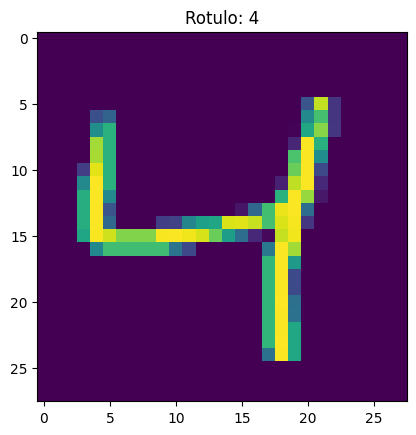

In [3]:
import matplotlib.pyplot as plt

for i in range(3):
    dado, rotulo = train_set[i]
    
    plt.figure()
    plt.imshow(dado[0])
    plt.title('Rotulo: ' + str(rotulo))

In [9]:
from torch.utils.data import DataLoader

args = {
    'batch_size': 20,
    'num_workers': 4,
    'num_classes': 10,
    'lr': 1e-4,
    'weight_decay': 5e-4,
    'num_epochs': 30
}

train_loader = DataLoader(train_set, batch_size=args['batch_size'], shuffle=True, num_workers=args['num_workers'])
test_loader = DataLoader(test_set, batch_size=args['batch_size'], shuffle=True, num_workers=args['num_workers'])

In [10]:
import torch
from torch import nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, out_size):
        super(MLP, self).__init__()
        
        self.features = nn.Sequential(nn.Linear(input_size, hidden_size), nn.ReLU(), nn.Linear(hidden_size, hidden_size), nn.ReLU())
        
        self.out = nn.Linear(hidden_size, out_size)
        self.softmax = nn.Softmax()
        
    def forward(self, X):
        X = X.view(X.size(0), -1)
        
        feature = self.features(X)
        output = self.softmax(self.out(feature))
        
        return output
    
input_size  = 28 * 28
hidden_size = 128
out_size    = 10

net = MLP(input_size, hidden_size, out_size)

In [18]:
from torch import optim
import numpy as np

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

for epoch in range(args['num_epochs']):
    epoch_loss = []

    for dado, rotulo in train_loader:
        optimizer.zero_grad()

        pred = net(dado)
        loss = criterion(pred, rotulo)

        loss.backward()
        optimizer.step()

        epoch_loss.append(loss.item())

    epoch_loss = np.array(epoch_loss)
    print("Época %d, Loss: %.4f, +- %.4f" % (epoch, epoch_loss.mean(), epoch_loss.std()))


Época 0, Loss: 2.2704, +- 0.0879
Época 1, Loss: 2.2696, +- 0.0896
Época 2, Loss: 2.2714, +- 0.0857
Época 3, Loss: 2.2710, +- 0.0872
Época 4, Loss: 2.2690, +- 0.0857
Época 5, Loss: 2.2659, +- 0.0894
Época 6, Loss: 2.2622, +- 0.0885
Época 7, Loss: 2.2559, +- 0.0901
Época 8, Loss: 2.2529, +- 0.0899
Época 9, Loss: 2.2535, +- 0.0893
Época 10, Loss: 2.2535, +- 0.0929
Época 11, Loss: 2.2550, +- 0.0915
Época 12, Loss: 2.2536, +- 0.0913
Época 13, Loss: 2.2494, +- 0.0914
Época 14, Loss: 2.2484, +- 0.0911
Época 15, Loss: 2.2474, +- 0.0914
Época 16, Loss: 2.2418, +- 0.0900
Época 17, Loss: 2.2393, +- 0.0896
Época 18, Loss: 2.2389, +- 0.0939
Época 19, Loss: 2.2370, +- 0.0932
Época 20, Loss: 2.2343, +- 0.0941
Época 21, Loss: 2.2336, +- 0.0923
Época 22, Loss: 2.2322, +- 0.0923
Época 23, Loss: 2.2318, +- 0.0950


KeyboardInterrupt: 